In [1]:
# Prepare
import pandas as pd
import os
os.chdir('/Users/denis/Documents/Projects/hiv-analysis/hiv-signature-analysis')
%load_ext rpy2.ipython
%R source('/Users/denis/Documents/Projects/scripts/Support.R')

R object with classes: ('list',) mapped to:
<ListVector - Python:0x107319ef0 / R:0x7f8038b35ce8>
[SignatureTranslatedFunc..., BoolVector]
  value: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x107319ea8 / R:0x7f8037e02518>
  visible: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x107326cb0 / R:0x7f8035936f28>
[       0]

## Analysis of Batch Effect Removal

### Overview

The purpose of this notebook is to investigate the effect of the batch effect removal algorithm on the HIV-infected podocyte cell-line data.

### Computation

In [3]:
# Infiles
infiles = ['f2-normalized_expression_data.dir/podocyte_cell_line-vst.txt', 'f3-adjusted_expression_data.dir/podocyte_cell_line-vst_corrected.txt']

# Read data
vstDataframe = pd.read_table(infiles[0]).set_index('gene_symbol')
vstDataframe.head()

,h0.2,h0.3,h0.4,h12.3,h12.4,h24.3,h24.4,h48.2,h48.3,h48.4,h6.2,h6.3,h6.4
gene_symbol,,,,,,,,,,,,,
A1BG,5.503935,7.076264,5.241655,7.060819,5.235642,6.551762,5.018838,5.569804,7.344000,5.366197,4.886763,6.966740,5.421723
A1CF,5.980715,6.498909,6.332309,6.396090,6.368596,6.399975,6.169393,6.307608,6.135498,6.552144,5.912574,6.309226,6.713958
A2M,6.649431,7.374486,6.821825,6.959679,6.743027,7.012625,6.605288,6.283479,6.811028,6.537748,6.290440,7.157131,6.898083
A2M-AS1,6.094726,5.404475,6.604511,5.722483,6.270075,5.333341,6.654487,6.872761,4.941792,6.825091,6.606226,4.645411,6.034259
A2ML1,6.990537,6.655460,7.086898,6.719354,6.814397,7.134748,7.106763,7.123133,6.577777,7.044083,6.991728,7.048220,7.012193


In [4]:
# Read data
vstDataframeCorrected = pd.read_table(infiles[1]).set_index('gene_symbol')
vstDataframeCorrected.head()

,h0.2,h0.3,h0.4,h12.3,h12.4,h24.3,h24.4,h48.2,h48.3,h48.4,h6.2,h6.3,h6.4
gene_symbol,,,,,,,,,,,,,
A1BG,6.147843,6.005296,5.897374,5.996267,5.885600,5.475812,5.659614,6.239405,6.282005,6.023686,5.659350,5.901442,6.054677
A1CF,6.264581,6.448386,6.214554,6.350930,6.250209,6.349119,6.052481,6.525110,6.108788,6.432085,6.223761,6.271659,6.591261
A2M,7.034336,7.088201,6.876766,6.670464,6.789030,6.725371,6.655692,6.657670,6.521471,6.587131,6.728799,6.869803,6.941809
A2M-AS1,5.626558,6.192881,6.163389,6.506272,5.819773,6.135803,6.210562,6.240294,5.761161,6.384660,5.923127,5.457303,5.588230
A2ML1,6.892532,6.788747,7.028152,6.835495,6.752410,7.244471,7.043618,6.995471,6.719591,6.984454,6.917995,7.151627,6.950036


In [5]:
# Create annotation dataframe
annotationDataframe = pd.DataFrame([[x, x.split('.')[0], x.split('.')[1]] for x in vstDataframe.columns], columns=['sample_id','timepoint','batch'])
annotationDataframe.head()

,sample_id,timepoint,batch
0,h0.2,h0,2
1,h0.3,h0,3
2,h0.4,h0,4
3,h12.3,h12,3
4,h12.4,h12,4


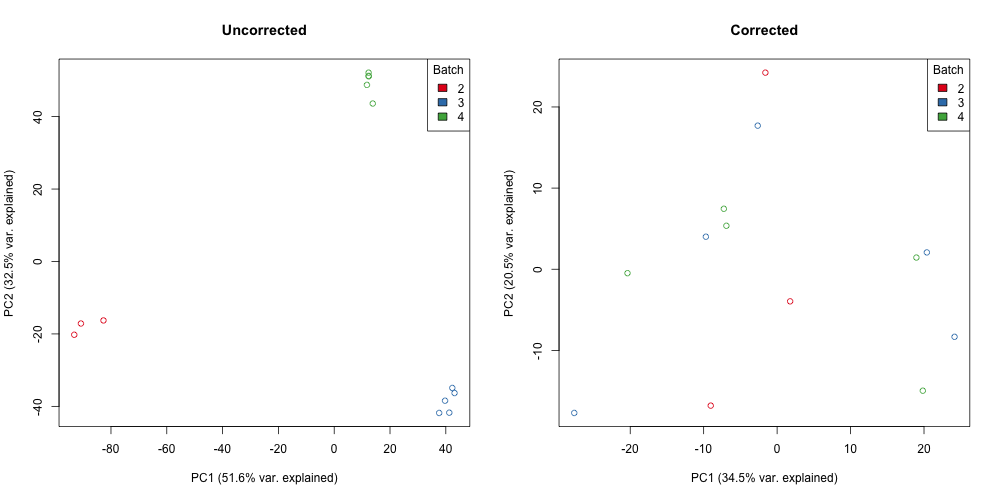

In [21]:
%%R -i vstDataframe,vstDataframeCorrected,annotationDataframe -h 500 -w 1000

# Set grid
par(mfrow=c(1,2))

### Uncorrected
# Run PCA
pcaRes <- runPCA(vstDataframe)

# Get plot matrix
plotMatrix <- pcaRes$x

# Get legend
colorLegend <- getLegend(rownames(annotationDataframe), annotationDataframe$batch, colors=c('#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'))

# PCs
PCs <- c('PC1', 'PC2')

# Plot
plot(plotMatrix[,PCs],
     col=colorLegend$colors,
     xlab=pcaRes$varLabels[PCs[1]],
     ylab=pcaRes$varLabels[PCs[2]],
     main='Uncorrected')

# Legend
legend('topright', legend=names(colorLegend$legend), fill=colorLegend$legend, title='Batch')

### Corrected
# Run PCA
pcaRes <- runPCA(vstDataframeCorrected)

# Get plot matrix
plotMatrix <- pcaRes$x

# Get legend
colorLegend <- getLegend(rownames(annotationDataframe), annotationDataframe$batch, colors=c('#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'))

# PCs
PCs <- c('PC1', 'PC2')

# Plot
plot(plotMatrix[,PCs],
     col=colorLegend$colors,
     xlab=pcaRes$varLabels[PCs[1]],
     ylab=pcaRes$varLabels[PCs[2]],
     main='Corrected')

# Legend
legend('topright', legend=names(colorLegend$legend), fill=colorLegend$legend, title='Batch')

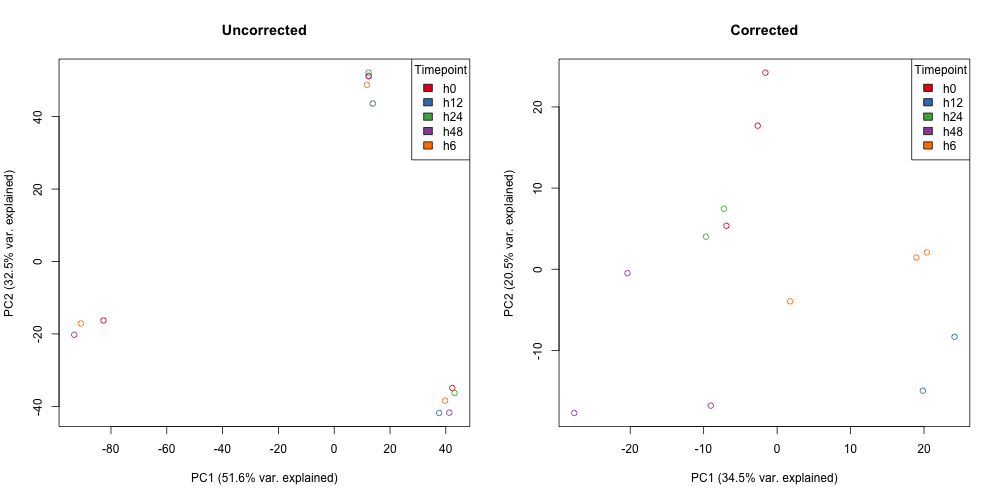

In [22]:
%%R -i vstDataframe,vstDataframeCorrected,annotationDataframe -h 500 -w 1000

# Set grid
par(mfrow=c(1,2))

### Uncorrected
# Run PCA
pcaRes <- runPCA(vstDataframe)

# Get plot matrix
plotMatrix <- pcaRes$x

# Get legend
colorLegend <- getLegend(rownames(annotationDataframe), annotationDataframe$timepoint, colors=c('#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'))

# PCs
PCs <- c('PC1', 'PC2')

# Plot
plot(plotMatrix[,PCs],
     col=colorLegend$colors,
     xlab=pcaRes$varLabels[PCs[1]],
     ylab=pcaRes$varLabels[PCs[2]],
     main='Uncorrected')

# Legend
legend('topright', legend=names(colorLegend$legend), fill=colorLegend$legend, title='Timepoint')

### Corrected
# Run PCA
pcaRes <- runPCA(vstDataframeCorrected)

# Get plot matrix
plotMatrix <- pcaRes$x

# Get legend
colorLegend <- getLegend(rownames(annotationDataframe), annotationDataframe$timepoint, colors=c('#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'))

# PCs
PCs <- c('PC1', 'PC2')

# Plot
plot(plotMatrix[,PCs],
     col=colorLegend$colors,
     xlab=pcaRes$varLabels[PCs[1]],
     ylab=pcaRes$varLabels[PCs[2]],
     main='Corrected')

# Legend
legend('topright', legend=names(colorLegend$legend), fill=colorLegend$legend, title='Timepoint')

### Plots